In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

## 1. Simple EDA and Baseline Model

In [2]:
# Load the cleaned complete data
all_df = pd.read_pickle('../dump/complete_data_cleaned')

In [3]:
all_df.head()

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity,log_owu,T_movie_age,T_book_age
1,The Godfather,9.2,R,"{Drama, Crime}",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,0.0567,5.257495,5.552960,0.263736,-1.332806,0.056703,-2.869923,-0.881468,0.856982,0.413280
2,Harry Potter and the Sorcerer's Stone,7.6,PG,"{Family, Adventure, Fantasy}",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,0.0121,8.651724,11.136048,0.182748,-1.699649,0.012077,-4.416414,2.134535,-0.275980,-0.435987
4,Little Women,7.8,PG,"{Drama, Romance}",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,0.0098,12.273731,14.538217,0.005707,-5.166120,0.009810,-4.624402,0.966743,-1.861227,1.779071
8,Little Women,7.3,PG,"{Drama, Romance, Family}",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,0.0135,6.777647,7.326466,0.098874,-2.313910,0.013451,-4.308677,-0.062204,0.062719,1.779071
13,Little Women,7.2,Other,"{Drama, Romance, Family}",1933-11-24,424000.0,NaN,32634196.0,NaN,115.0,...,0.0181,15.337210,16.349207,0.084191,-2.474665,0.018103,-4.011653,NaN,1.821909,1.779071


In [4]:
# convert unit of 'opening_weekend_usa' to million dollors
all_df['opening_weekend_usa'] = all_df['opening_weekend_usa']/1e6

In [5]:
all_df.describe()

,rating,budget,opening_weekend_usa,gross_usa,gross_world,runtime,rating_value_b,rating_count_b,review_count_b,page,...,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity,log_owu,T_movie_age,T_book_age
count,830.000000,8.300000e+02,596.000000,8.300000e+02,6.800000e+02,830.000000,830.000000,8.300000e+02,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,596.000000,830.000000,830.000000
mean,6.728313,2.846106e+07,11.199472,4.396854e+07,9.333721e+07,116.904358,3.892747,2.517862e+05,8242.527711,338.582716,...,0.126429,8.523448,10.909193,0.125551,-3.993786,0.126430,-4.754056,0.155248,-0.050212,-0.037808
std,0.895266,3.429356e+07,17.769474,5.367619e+07,1.568685e+08,24.384076,0.357243,6.297016e+05,18125.773472,170.306914,...,0.447143,3.294378,3.796890,0.948464,1.930753,0.447144,2.636906,0.971834,0.920729,0.936634
min,3.000000,3.000000e+04,0.000301,6.630000e+02,7.600000e+01,69.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,1.945910,3.663562,0.000012,-11.346477,0.000006,-11.959746,-2.340600,-2.077158,-3.043163
25%,6.200000,5.025000e+06,0.488126,1.431659e+07,9.979924e+06,101.000000,3.780000,4.301500e+03,281.000000,236.250000,...,0.001125,6.020411,8.044778,0.005404,-5.220643,0.001152,-6.766709,-0.714234,-0.699542,-0.622086
50%,6.800000,1.800000e+07,5.626404,3.157063e+07,3.382803e+07,112.000000,3.930000,3.270200e+04,1730.000000,318.500000,...,0.008900,7.855537,10.077441,0.017978,-4.018607,0.008891,-4.722863,0.351512,-0.122958,-0.065765
75%,7.400000,3.575000e+07,13.519931,4.985129e+07,1.089263e+08,128.000000,4.080000,2.069002e+05,6699.500000,405.500000,...,0.059750,10.498169,13.286783,0.067433,-2.696662,0.059788,-2.816951,0.837800,0.700554,0.581731
max,9.200000,2.500000e+08,152.535747,4.080107e+08,1.033927e+09,280.000000,4.690000,7.292896e+06,173808.000000,1463.000000,...,6.589700,18.403535,21.343842,26.369863,3.272222,6.589744,1.885514,2.561571,1.883462,2.762395


In [6]:
# all_df.country

In [7]:
# Remove outliers
# all_df = all_df[all_df.opening_weekend_usa < 0.4e8]
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1 to 1520
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_title             830 non-null    object        
 1   rating                  830 non-null    float64       
 2   MPAA                    830 non-null    object        
 3   genre                   830 non-null    object        
 4   release_date            830 non-null    datetime64[ns]
 5   budget                  830 non-null    float64       
 6   opening_weekend_usa     596 non-null    float64       
 7   gross_usa               830 non-null    float64       
 8   gross_world             680 non-null    float64       
 9   runtime                 830 non-null    float64       
 10  director                830 non-null    object        
 11  writer                  830 non-null    object        
 12  actor                   830 non-null    object   

In [8]:
cat_feature = ['MPAA','genre','distributor','language','country']
con_feature = ['budget','runtime','film_count_d','avg_rating_d','avg_gross_d','T_movie_age']
con_book_feature = ['T_book_age','publish_year','page','log_book_popularity','log_author_popularity']
target_candidate = ['opening_weekend_usa','log_owu','gross_usa','gross_world','rating']

potential_feature = ['rating_value_b','rating_count_b','review_count_b']

In [9]:
# Choose only the continuous variables for now

cc_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + cat_feature].copy()
c_movie_df = all_df[['opening_weekend_usa'] + con_feature].copy() # only continuous features for movie
c_all_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature].copy() # continuous features both movie and book

In [10]:
# c_df.describe()

In [11]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 1 to 1520
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   opening_weekend_usa    596 non-null    float64
 1   budget                 830 non-null    float64
 2   runtime                830 non-null    float64
 3   film_count_d           830 non-null    int64  
 4   avg_rating_d           830 non-null    float64
 5   avg_gross_d            830 non-null    int64  
 6   T_movie_age            830 non-null    float64
 7   T_book_age             830 non-null    float64
 8   publish_year           830 non-null    float64
 9   page                   830 non-null    float64
 10  log_book_popularity    830 non-null    float64
 11  log_author_popularity  830 non-null    float64
 12  MPAA                   830 non-null    object 
 13  genre                  830 non-null    object 
 14  distributor            830 non-null    object 
 15  langu

In [12]:
# sns.pairplot(c_df, plot_kws=dict(alpha=.1, edgecolor='none'))

### Baseline Model
Only consider the continuous predictors and use 'opening_weekend_usa'.

In [13]:
# Separate features and target variable

def get_Xy(df):
    
    df = df.dropna()
    
    target = 'opening_weekend_usa'
#     target = 'rating'
#     target = 'gross_usa'
    all_column = df.columns.values.tolist()
    all_column.remove(target)

    y = df[target]
    X = df[all_column]
    
    return X, y

In [14]:
X, y = get_Xy(c_all_df)

In [15]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
#     # perform train/val split
#     X_train, X_val, y_train, y_val = \
#         train_test_split(X, y, test_size=0.2, random_state=25)

    # train/val/test split
    # holding test set
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred)

    ax.set_xlabel('Opening weekend gross (USD)')
    ax.set_ylabel('Prediction (USD)')

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)
    
    y=x
    plt.plot(x,y,color='red')


Train R^2 score was: 0.4880662590443968
Validation R^2 score was: 0.48742439238705315
Feature coefficient results: 

budget : 0.00
runtime : -0.00
film_count_d : 0.02
avg_rating_d : -1.14
avg_gross_d : -0.00
T_movie_age : -2.61
T_book_age : 1.78
publish_year : 0.05
page : 0.01
log_book_popularity : 0.04
log_author_popularity : 0.60


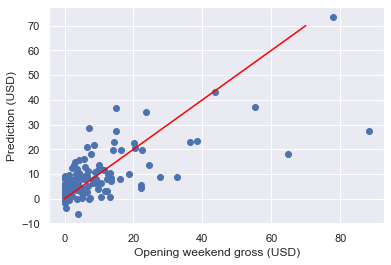

In [16]:
# Reports for model with all features
split_and_validate(X,y)


Train R^2 score was: 0.473965174147961
Validation R^2 score was: 0.5042600723203712
Feature coefficient results: 

budget : 0.00
runtime : 0.01
film_count_d : 0.05
avg_rating_d : -1.09
avg_gross_d : -0.00
T_movie_age : -1.22


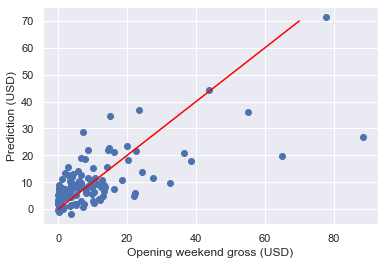

In [17]:
# Reports for model with features of movie only
X, y = get_Xy(c_movie_df)
split_and_validate(X,y)

In [60]:
def get_score(X_train,X_val,y_train,v_val):
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred)

    ax.set_xlabel('Opening weekend gross (USD)')
    ax.set_ylabel('Prediction (USD)')

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)
    
    y=x
    plt.plot(x,y,color='red')

### Cross-validation

In [61]:
# Will not use X_test, y_test
lr = LinearRegression()
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

In [62]:
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse

In [63]:
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

Meam of validation score is: nan
[nan nan nan nan nan]


### Find outliers and evaluate the model again

## 2. Basic Feature Engineering

### Split the data set into Train / Validation / Test sets

In [64]:
# Choose df
# X, y = get_Xy(c_movie_df)
X, y = get_Xy(c_all_df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

### * Scaled Features

In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [66]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train), lr.score(scaler.transform(X_val),y_val)

(0.48806625904439693, 0.4874243923869028)

In [67]:
list(zip((con_feature),lr.coef_))

[('budget', 10.464848245790677),
 ('runtime', -0.0941451609625184),
 ('film_count_d', 0.16514664655297012),
 ('avg_rating_d', -0.6155009682176027),
 ('avg_gross_d', -0.2927741422288692),
 ('T_movie_age', -1.7480159505663442)]

### * Polynomial Fearues
(degree=2): Adding interaction terms and second order feature.

In [68]:
# Only with interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only = True)

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

lr.fit(X_train_poly,y_train)
lr.score(X_train_poly,y_train), lr.score(X_val_poly,y_val)

(0.6718062091997166, 0.29487837288526986)

In [69]:
# increased train score, but decreased val score.
# overfitting

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only = False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

lr.fit(X_train_poly,y_train)
lr.score(X_train_poly,y_train), lr.score(X_val_poly,y_val)

(0.6931516456270843, 0.381656989121977)

In [71]:
# overfitting even more

## 3. Intermediate Feature Engineering: Categorical features
Use `OneHotEncoder` or `pd.get_dummies(df['column'])` to treat categorical variables

### 1. genre

In [72]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['genre']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [73]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1).drop(columns=['Other'])



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1).drop(columns=['Other'])


Train R^2 score was: 0.428864683030736
Validation R^2 score was: 0.12983969882953772
Feature coefficient results: 

budget : 1.68
runtime : 4.32
film_count_d : 1.50
avg_rating_d : 0.92
avg_gross_d : 0.79
T_movie_age : 5.02
genre : 4.54


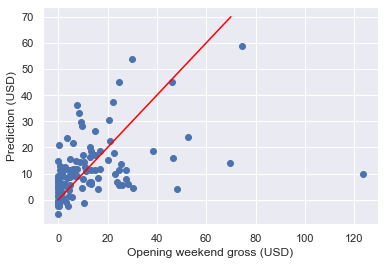

In [74]:
get_score(X_train, X_val, y_train, y_val)

### 2. MPAA rating

In [75]:
# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['MPAA']]
df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [76]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['MPAA'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['MPAA'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.4084176289167277
Validation R^2 score was: 0.16264378460141238
Feature coefficient results: 

budget : -0.11
runtime : -0.11
film_count_d : -0.11
avg_rating_d : 1.14
avg_gross_d : 0.21
T_movie_age : 1.14
genre : -1.35
MPAA : 0.21


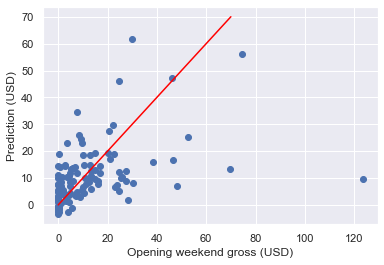

In [77]:
get_score(X_train, X_val, y_train, y_val)

### 3. language

In [78]:
# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['language']]
df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [79]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['language'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['language'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.4112160864182015
Validation R^2 score was: 0.12158104001641357
Feature coefficient results: 

budget : 0.00
runtime : 0.61
film_count_d : -0.17
avg_rating_d : 3.08
avg_gross_d : -5.04
T_movie_age : -2.59
genre : 0.30
MPAA : 11.05
language : 0.32


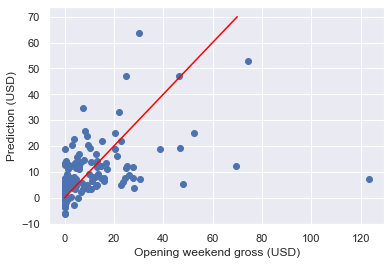

In [80]:
get_score(X_train, X_val, y_train, y_val)

### 4. country

In [81]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['country']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [82]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.4241796162532875
Validation R^2 score was: 0.16313691942251207
Feature coefficient results: 

budget : -0.86
runtime : -3.30
film_count_d : -3.25
avg_rating_d : -5.01
avg_gross_d : 0.45
T_movie_age : 0.00
country : 11.12


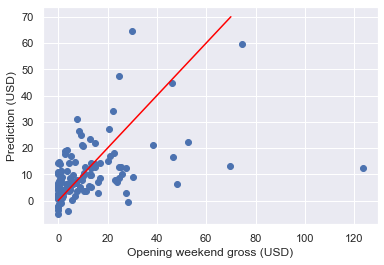

In [83]:
get_score(X_train, X_val, y_train, y_val)

### 5. distributor

In [84]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['opening_weekend_usa'] + con_feature + ['distributor']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [85]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['distributor'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['distributor'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.4167862970298878
Validation R^2 score was: 0.127143010554564
Feature coefficient results: 

budget : -230625214507258.56
runtime : 141987788440719.69
film_count_d : -227950673556106.28
avg_rating_d : -285650708181374.81
avg_gross_d : 376251055688212.88
T_movie_age : 331046641072038.62
distributor : -501683319575818.56


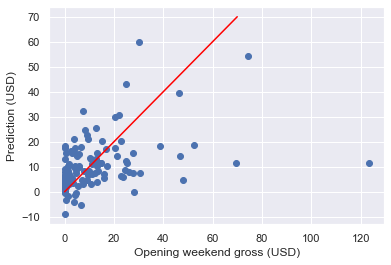

In [86]:
get_score(X_train, X_val, y_train, y_val)

### 6. all categorical variable

In [87]:
# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])

# Scaling continuous variables
X_train_con = X_train[con_feature + con_book_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])

# Scaling continuous variables
X_val_con = X_val[con_feature + con_book_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.49311931522655594
Validation R^2 score was: 0.13111550034163233
Feature coefficient results: 

budget : 0.92
runtime : 4.81
film_count_d : -0.65
avg_rating_d : 0.27
avg_gross_d : -0.00
T_movie_age : 3.48
T_book_age : 3.36
publish_year : 0.63
page : 0.20
log_book_popularity : -3.46
log_author_popularity : 1.52
genre : 7.07
MPAA : 4.23
language : 21528296530844.95
country : 21528296530844.70
distributor : 21528296530844.14


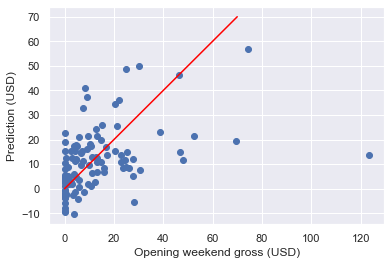

In [88]:
get_score(X_train, X_val, y_train, y_val)

In [89]:
def all_variable_score(df_type):
    
    
    if df_type == 'movie only':
        con = con_feature
        df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
    
    if df_type == 'movie+book':
        con = con_feature + con_book_feature
        df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
    
    try:
        X, y = get_Xy(df)
    except UnboundLocalError:
        print("Pick 'movie only' or 'movie+book'")



    # train_test_split
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


    # Train set
    # Convert all cat to dummies
    X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
    X_train_MPAA = pd.get_dummies(X_train['MPAA'])
    X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
    X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
    X_train_distributor = pd.get_dummies(X_train['distributor'])

    # Scaling continuous variables
    X_train_con = X_train[con]
    X_train_con_scaled = scaler.fit_transform(X_train_con)
    X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

    #Combine
    X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                         X_train_con_scaled_df],axis=1)



    # Val set
    # Convert genre to dummies
    X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
    X_val_MPAA = pd.get_dummies(X_val['MPAA'])
    X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
    X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
    X_val_distributor = pd.get_dummies(X_val['distributor'])

    # Scaling continuous variables
    X_val_con = X_val[con]
    X_val_con_scaled = scaler.fit_transform(X_val_con)
    X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

    #Combine
    X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                       X_val_con_scaled_df],axis=1)
    
    return get_score(X_train, X_val, y_train, y_val)


Train R^2 score was: 0.48128831262490235
Validation R^2 score was: 0.09978037482680457
Feature coefficient results: 

budget : 1.56
runtime : 5.15
film_count_d : -0.31
avg_rating_d : 1.00
avg_gross_d : 0.89
T_movie_age : 4.40
T_book_age : 3.63
publish_year : 1.96
page : 0.52
log_book_popularity : -3.00
log_author_popularity : 1.99
genre : 5.29
MPAA : 4.94
language : 24040889821885.79
country : 24040889821886.58
distributor : 24040889821887.43


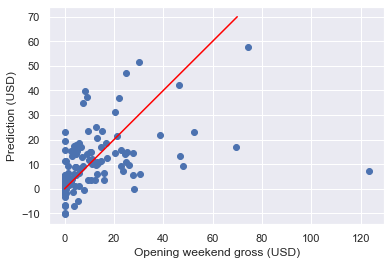

In [90]:
all_variable_score('movie only')


Train R^2 score was: 0.49311931522655594
Validation R^2 score was: 0.13111550034163233
Feature coefficient results: 

budget : 0.92
runtime : 4.81
film_count_d : -0.65
avg_rating_d : 0.27
avg_gross_d : -0.00
T_movie_age : 3.48
T_book_age : 3.36
publish_year : 0.63
page : 0.20
log_book_popularity : -3.46
log_author_popularity : 1.52
genre : 7.07
MPAA : 4.23
language : 21528296530844.95
country : 21528296530844.70
distributor : 21528296530844.14


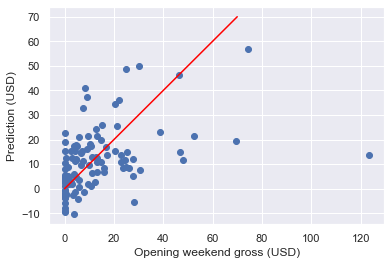

In [91]:
all_variable_score('movie+book')

## 4. Incorporate Polynomial Features

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only = True)


# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])

# Scaling continuous variables
X_train_con = X_train[con_feature + con_book_feature]
X_train_con_scaled = poly.fit_transform(scaler.fit_transform(X_train_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature+con_book_feature) # poly coef columns
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns = poly_column,\
                                     index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])

# Scaling continuous variables
X_val_con = X_val[con_feature + con_book_feature]
X_val_con_scaled = poly.transform(scaler.fit_transform(X_val_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature+con_book_feature) # poly coef columns
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns = poly_column,\
                                   index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.6211979580799024
Validation R^2 score was: -0.12862361952267976
Feature coefficient results: 

budget : 0.67
runtime : 6.45
film_count_d : -1.47
avg_rating_d : 1.26
avg_gross_d : -2.13
T_movie_age : 3.83
T_book_age : 0.47
publish_year : 2.50
page : -1.15
log_book_popularity : -1.29
log_author_popularity : 3.03
genre : 7.32
MPAA : 4.22
language : 152449920663144.56
country : 152449920663141.22
distributor : 152449920663144.53


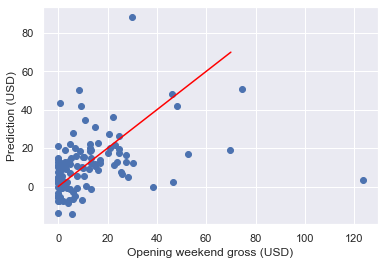

In [116]:
get_score(X_train, X_val, y_train, y_val)

## 4. Regularization

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

### * Ridge

In [95]:
## Fit a Ridge model on the standardized data

# ridge_model = Ridge(alpha = 0.001)
# ridge_model.fit(X_train,y_train)
# list(zip(X_train.columns, ridge_model.coef_))

In [96]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train, y_train)
print('The best value of alpha is:', ridge_model.alpha_)

The best value of alpha is: 100.0


In [97]:
# Fit Ridge model once again with the best alpha
ridge_model = Ridge(alpha = 100)
ridge_model.fit(X_train_con_scaled_df,y_train)
list(zip(X_train_con_scaled_df.columns, ridge_model.coef_))

[(0, 0.0),
 (1, 6.531231685372831),
 (2, 0.4004549043459629),
 (3, -0.5015410955466073),
 (4, 0.36267501454771783),
 (5, 0.48216275472537745),
 (6, -1.0448821819578058),
 (7, -0.8721311601339262),
 (8, 0.580168005586828),
 (9, 0.20665767582434386),
 (10, 0.757751309647009),
 (11, 0.1435279929109666),
 (12, 2.4007999799469912),
 (13, 1.1127964650585553),
 (14, 0.9668786352879757),
 (15, 0.4859141373977446),
 (16, -1.0769604179340626),
 (17, 0.4140220170354652),
 (18, -0.9915228154578952),
 (19, 0.16086636358110773),
 (20, 2.166091773750651),
 (21, -1.4505447139903207),
 (22, -0.23706741033278472),
 (23, -1.1976209171665964),
 (24, 0.29350637869716095),
 (25, 0.13084166751391146),
 (26, -1.2110559105687637),
 (27, -0.13280055236077817),
 (28, 0.259699914856593),
 (29, 0.3048109645260327),
 (30, 0.8778132263739896),
 (31, -0.11468616569235969),
 (32, -0.270721934619506),
 (33, 0.24394579604599476),
 (34, 0.6257903067600532),
 (35, -0.4379498360629471),
 (36, -0.03644548701858205),
 (37, -

In [98]:
val_pred = ridge_model.predict(X_val_con_scaled_df)
r2_score(y_val, val_pred)

0.13834901304783098


Train R^2 score was: 0.6211979580799024
Validation R^2 score was: -0.12862361952267976
Feature coefficient results: 

budget : 0.67
runtime : 6.45
film_count_d : -1.47
avg_rating_d : 1.26
avg_gross_d : -2.13
T_movie_age : 3.83
T_book_age : 0.47
publish_year : 2.50
page : -1.15
log_book_popularity : -1.29
log_author_popularity : 3.03
genre : 7.32
MPAA : 4.22
language : 152449920663144.56
country : 152449920663141.22
distributor : 152449920663144.53


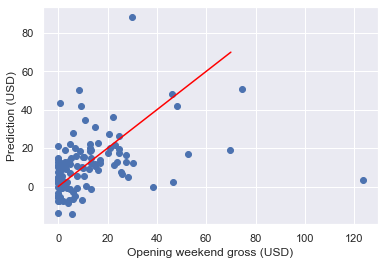

In [99]:
get_score(X_train, X_val, y_train, y_val)

### * LASSO

In [117]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train_con_scaled_df,y_train)
list(zip(X_train_con_scaled_df.columns, lasso_model.coef_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179.5525622596615, tolerance: 10.73292685660009
  model = cd_fast.enet_coordinate_descent(


[('1', 0.0),
 ('budget', 9.511484489922285),
 ('runtime', 0.9823952648668407),
 ('film_count_d', -0.8334378381093274),
 ('avg_rating_d', 0.28150659641641246),
 ('avg_gross_d', 0.9073787119228397),
 ('T_movie_age', -0.15525379017947857),
 ('T_book_age', -2.4108013953228444),
 ('publish_year', 1.280773115422568),
 ('page', -0.6099760687958559),
 ('log_book_popularity', 0.47178244504938316),
 ('log_author_popularity', 1.0778962985864864),
 ('budget runtime', 3.6382595861400997),
 ('budget film_count_d', 1.4415693343545661),
 ('budget avg_rating_d', 1.8291176222924808),
 ('budget avg_gross_d', -0.7305444823105672),
 ('budget T_movie_age', 0.2558070745679408),
 ('budget T_book_age', -4.38501402184217),
 ('budget publish_year', -4.948449982829456),
 ('budget page', -0.6431990624360868),
 ('budget log_book_popularity', 4.785220567595745),
 ('budget log_author_popularity', -3.339440678187307),
 ('runtime film_count_d', -1.176099917061404),
 ('runtime avg_rating_d', -1.8937531180571885),
 ('run

In [118]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha


alphavec = 10**np.linspace(-5,5,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_con_scaled_df, y_train)
print('The best value of alpha is:', lasso_model.alpha_)

The best value of alpha is: 2.066880249629082


In [119]:
lasso_model = Lasso(alpha = 2.08)
lasso_model.fit(X_train_con_scaled_df,y_train)
list(zip(X_train_con_scaled_df.columns, lasso_model.coef_))

[('1', 0.0),
 ('budget', 8.509991204575927),
 ('runtime', 0.0),
 ('film_count_d', -0.0),
 ('avg_rating_d', 0.0),
 ('avg_gross_d', 0.0),
 ('T_movie_age', -0.0),
 ('T_book_age', -0.0),
 ('publish_year', 0.0),
 ('page', 0.0),
 ('log_book_popularity', 0.0),
 ('log_author_popularity', 0.0),
 ('budget runtime', 1.208366549466814),
 ('budget film_count_d', 0.0),
 ('budget avg_rating_d', 0.0),
 ('budget avg_gross_d', 0.0),
 ('budget T_movie_age', -0.0),
 ('budget T_book_age', 0.0),
 ('budget publish_year', -0.0),
 ('budget page', 0.0),
 ('budget log_book_popularity', 0.0),
 ('budget log_author_popularity', -0.0),
 ('runtime film_count_d', 0.0),
 ('runtime avg_rating_d', -0.0),
 ('runtime avg_gross_d', 0.0),
 ('runtime T_movie_age', -0.0),
 ('runtime T_book_age', -0.0),
 ('runtime publish_year', 0.0),
 ('runtime page', 0.0),
 ('runtime log_book_popularity', 0.0),
 ('runtime log_author_popularity', 0.0),
 ('film_count_d avg_rating_d', 0.0),
 ('film_count_d avg_gross_d', 0.0),
 ('film_count_d T_m

In [122]:
val_pred = lasso_model.predict(X_val_con_scaled_df)
r2_score(y_val, val_pred)

0.16617998526983158